# Analysis Code 

At first, I load all the libraries we will need later on.

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from FASERnu_DetectorSim import FASERvDetectorSimulation

In [2]:
matplotlib.rcParams.update({'font.size': 15})

In [12]:
sim = FASERvDetectorSimulation(debug=False)
sim.set_detector(sigma_track_momentum=0.3)
output1 = sim.simulate("pythia.hepmc", 'out.json')

sim.set_detector(sigma_track_momentum=0.1)
output2 = sim.simulate("pythia.hepmc", 'out.json')

-- open file pythia.hepmc
-- output is stored in out.json
-- open file pythia.hepmc
-- output is stored in out.json


In [13]:
data1, data2 = [], []
for key, value in output1.items():
    data1.append([value['truth_kinematics']['x'], value['reco_kinematics']['x']])
for key, value in output2.items():
    data2.append([value['truth_kinematics']['x'], value['reco_kinematics']['x']])
data1 = np.array(data1)
data2 = np.array(data2)

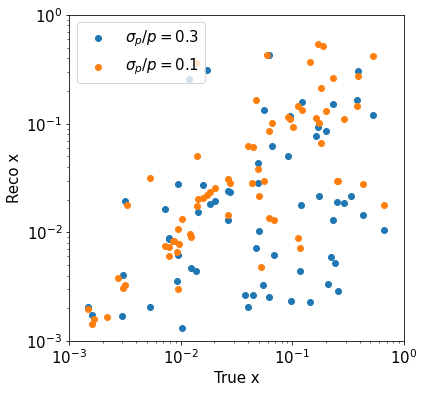

In [14]:
# initialize figure
fig = plt.figure(figsize=(6,6))
plt.scatter(data1.T[0], data1.T[1], label=r'$\sigma_{p}/p=0.3$')
plt.scatter(data2.T[0], data2.T[1], label=r'$\sigma_{p}/p=0.1$')
plt.xlim(1e-3,1)
plt.ylim(1e-3,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("True x")
plt.ylabel("Reco x")
plt.legend()
plt.show()